In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [38]:
#Model for analyse and convert image to vector
import matplotlib.image as mpimg
from skimage.feature import hog #Chịu trách nhiệm cho việc vector hóa ảnh
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage.io import imread
import os #Làm việc với folder ảnh inputs lưu trên máy

# **Load & Read data**

In [17]:
df = pd.read_csv(r"D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10000_metadata.csv")
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [19]:
df = df.drop(columns="dx_type", axis=1)

# **Processing missing values**

In [20]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(strategy="median")
df["age"] = impute.fit_transform(df[["age"]])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   age           10015 non-null  float64
 4   sex           10015 non-null  object 
 5   localization  10015 non-null  object 
dtypes: float64(1), object(5)
memory usage: 469.6+ KB


# **Mapping Diagnosis**

**Binary Classification**

In [22]:
df["dx"].unique()

array(['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec'], dtype=object)

In [23]:
df["bin_diagnosis"] = df["dx"].map(lambda x: 1 if x in ["mel", "bcc", "akiec", "vasc"] else 0)

# **Encoding categorical cols**

In [24]:
for col in df.columns:
    print(col, df[col].unique())

lesion_id ['HAM_0000118' 'HAM_0002730' 'HAM_0001466' ... 'HAM_0005579' 'HAM_0001576'
 'HAM_0002867']
image_id ['ISIC_0027419' 'ISIC_0025030' 'ISIC_0026769' ... 'ISIC_0033536'
 'ISIC_0032854' 'ISIC_0032258']
dx ['bkl' 'nv' 'df' 'mel' 'vasc' 'bcc' 'akiec']
age [80. 75. 60. 70. 55. 85. 65. 40. 50. 45. 35.  0. 30.  5. 25. 20. 10. 15.]
sex ['male' 'female' 'unknown']
localization ['scalp' 'ear' 'face' 'back' 'trunk' 'chest' 'upper extremity' 'abdomen'
 'unknown' 'lower extremity' 'genital' 'neck' 'hand' 'foot' 'acral']
bin_diagnosis [0 1]


In [ ]:
from sklearn.preprocessing import OneHotEncoder

cate_cols = ["sex", "localization"]


ohe = OneHotEncoder(sparse_output=False)
encoded = ohe.fit_transform(df[cate_cols])
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(cate_cols), index=df.index)
df = df.join(encoded_df)

df.head()

,lesion_id,image_id,dx,age,sex,localization,bin_diagnosis,sex_female,sex_male,sex_unknown,...,localization_face,localization_foot,localization_genital,localization_hand,localization_lower extremity,localization_neck,localization_scalp,localization_trunk,localization_unknown,localization_upper extremity
0,HAM_0000118,ISIC_0027419,bkl,80.0,male,scalp,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,HAM_0000118,ISIC_0025030,bkl,80.0,male,scalp,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,HAM_0002730,ISIC_0026769,bkl,80.0,male,scalp,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,HAM_0002730,ISIC_0025661,bkl,80.0,male,scalp,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,HAM_0001466,ISIC_0031633,bkl,75.0,male,ear,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Link the image path into dataframe**

In [29]:
base_dir = r"D:\khoane\Cybersoft\ML&DL\Capstone1\Data"

part1 = r"D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10000_images_part_1"
part2 = r"D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10000_images_part_2"

def find_image_path(image_id):
    file_name = image_id + ".jpg"
    path1 = os.path.join(part1, file_name)
    path2 = os.path.join(part2, file_name)
    
    if os.path.exists(path1):
        return path1
    elif os.path.exists(path2):
        return path2
    else:
        return None
    
df["image_path"] = df["image_id"].apply(find_image_path)

In [32]:
df.head()

,lesion_id,image_id,dx,age,sex,localization,bin_diagnosis,sex_female,sex_male,sex_unknown,...,localization_foot,localization_genital,localization_hand,localization_lower extremity,localization_neck,localization_scalp,localization_trunk,localization_unknown,localization_upper extremity,image_path
0,HAM_0000118,ISIC_0027419,bkl,80.0,male,scalp,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10...
1,HAM_0000118,ISIC_0025030,bkl,80.0,male,scalp,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10...
2,HAM_0002730,ISIC_0026769,bkl,80.0,male,scalp,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10...
3,HAM_0002730,ISIC_0025661,bkl,80.0,male,scalp,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10...
4,HAM_0001466,ISIC_0031633,bkl,75.0,male,ear,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D:\khoane\Cybersoft\ML&DL\Capstone1\Data\HAM10...


In [33]:
df["image_path"].isna().sum()

0

# **Load image**

In [36]:
# Tạo hàm đọc và hiển thị ảnh
def display_images(column, number):
    number_to_visuaize = number
    rows = 1
    cols = number_to_visuaize

    fig, axes = plt.subplots(rows, cols, figsize=(15,5))

    #Duyệt qua từng hàng image_path để đọc và hiển thị ảnh
    for index, row in df.head(number_to_visuaize).iterrows():
        image_path = row[column]
        # Đọc ảnh
        image = mpimg.imread(image_path)
        ax = axes[index]
        ax.imshow(image, cmap="grey")
        ax.set_title(f"{row['bin_diagnosis']}")
        ax.axis("off")

    plt.tight_layout()
    plt.show()

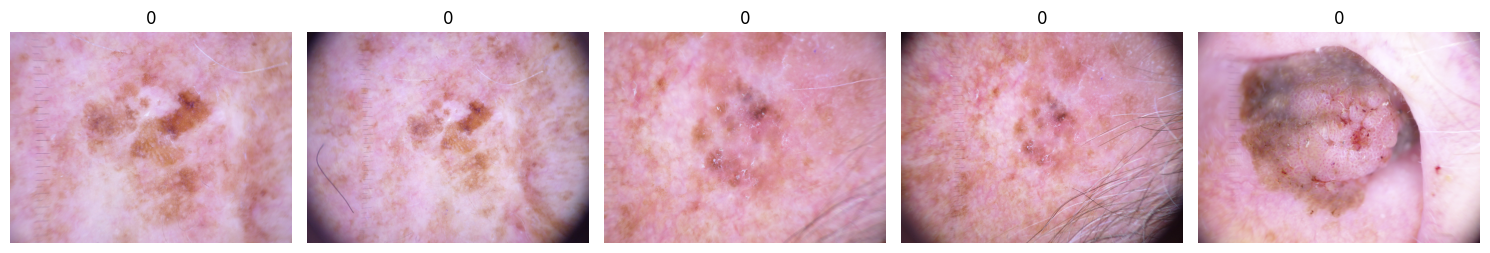

In [37]:
display_images("image_path", 5)

# **Extract image features**

In [39]:
def extract_features(image_paths, target_size=(128,128)):
    features = []

    for path in image_paths:
        try:
            # Read image
            image = imread(path)

            # Convert to grayscale
            if image.ndim == 3:
                image = rgb2gray(image)

            # Resize
            img_resized = resize(image, target_size, anti_aliasing=True)

            # HOG feature
            hog_features = hog(
                img_resized,
                pixels_per_cell=(16,16),
                cells_per_block=(2,2),
                feature_vector=True
            )

            # Add intensity stats
            mean_intensity = np.mean(img_resized)
            std_intensity = np.std(img_resized)

            # Combine features
            feature_vector = np.concatenate(
                [hog_features, [mean_intensity, std_intensity]]
            )
            features.append(feature_vector)

        except Exception as e:
            print(f"⚠ Lỗi khi xử lý ảnh {path} → {e}")
            features.append(np.zeros(50))  # fallback vector nếu lỗi
            continue

    return np.array(features)

# **Split dataset into train and test**

In [40]:
X = extract_features(df["image_path"])
y = df["bin_diagnosis"]

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

# **Data Normalization**

In [44]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Training model**

In [45]:
from sklearn.svm import SVC

svm_model = SVC(kernel="rbf", random_state=42)
svm_model.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False
